<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/Laboratorio2StastisticalLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ¿Cual es el problema
# Determinar si un texto es positivo o negativo
# Lo vamos a realizar por medio de RNN

In [2]:
pip install tensorflow

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
# paso 1: Crear mi dataset de entrenamiento

# Creando dataset de entrenamiento
textos = [
    "El servicio que me brinaron fue excelente, lo recomiento.",
    "No me atendieron, muy mal servicio",
    "Estoy muy decepcionado de este servicio",
    "El servicio fue muy lento. No me gustó.",
    "No lograron resolver mi problema, fueron horas de espera para que me pudieran atender y al final terminé colgando",
    "No regresaría al lugar por una mala atencion",
    "Nunca llego la orden solicitada",
    "La calidad del servicio fue deficiente, dejan mucho que desear",
    "Los agentes de servicio de hoy fueron muy amables y atentos",
    "El servicio de atención al cliente me hizo sentir como si fuera su única prioridad. El agente fue rápido, eficiente y, sobre todo, amable",
    "El lugar es muy agradable, excelente ambiente y buena atencion",
    "Todo excelente! 100% recomendado",
    "Servicio prácticamente inexistente, no saben tratar a sus clientes.",
    "La atención al cliente es increible y la calidad del servicio es excelente, muy recomendado",
    "Atención clara y super rápida. Se portaron muy amables y logré resolver mi inconveniente",
    "La atención del personal fue muy buena y rapida",
]

etiquetas = np.array([ 1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1 ])

In [5]:
# Verificar el tamaño de textos y etiquetas
print(len(textos))
print(etiquetas.size)

16
16


In [6]:
for texto in textos:
  print(texto)

El servicio que me brinaron fue excelente, lo recomiento.
No me atendieron, muy mal servicio
Estoy muy decepcionado de este servicio
El servicio fue muy lento. No me gustó.
No lograron resolver mi problema, fueron horas de espera para que me pudieran atender y al final terminé colgando
No regresaría al lugar por una mala atencion
Nunca llego la orden solicitada
La calidad del servicio fue deficiente, dejan mucho que desear
Los agentes de servicio de hoy fueron muy amables y atentos
El servicio de atención al cliente me hizo sentir como si fuera su única prioridad. El agente fue rápido, eficiente y, sobre todo, amable
El lugar es muy agradable, excelente ambiente y buena atencion
Todo excelente! 100% recomendado
Servicio prácticamente inexistente, no saben tratar a sus clientes.
La atención al cliente es increible y la calidad del servicio es excelente, muy recomendado
Atención clara y super rápida. Se portaron muy amables y logré resolver mi inconveniente
La atención del personal fue m

In [7]:
from sklearn.model_selection import train_test_split

textos_train, textos_test, etiquetas_train, etiquetas_test = train_test_split(textos, etiquetas, test_size=0.2, random_state=42)


Tokenización y secuenciación

In [8]:
tokenizer = Tokenizer(num_words=1000, lower=True, oov_token="<00V>")
tokenizer.fit_on_texts(textos_train)  # Ajustamos el tokenizer solo con el conjunto de entrenamiento

secuencias_train = tokenizer.texts_to_sequences(textos_train)
secuencias_test = tokenizer.texts_to_sequences(textos_test)

secuencias_train_pad = pad_sequences(secuencias_train, padding="post")
secuencias_test_pad = pad_sequences(secuencias_test, padding="post", maxlen=secuencias_train_pad.shape[1])  # Aseguramos que tengan el mismo tamaño que las de entrenamiento


In [9]:
print("Texto original:", textos_train[0])
print("Secuencia:", secuencias_train[0])
print("Secuencia con padding:", secuencias_train_pad[0])


Texto original: La atención al cliente es increible y la calidad del servicio es excelente, muy recomendado
Secuencia: [5, 9, 10, 16, 11, 23, 3, 5, 17, 12, 2, 11, 13, 4, 18]
Secuencia con padding: [ 5  9 10 16 11 23  3  5 17 12  2 11 13  4 18  0  0  0  0  0  0  0  0  0]


Definimos modelo

In [10]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=50),  # Layer de Embedding
    tf.keras.layers.LSTM(64),  # RNN usando LSTM
    tf.keras.layers.Dense(1, activation="sigmoid")  # Salida binaria (positivo/negativo)
])


Resumen

In [11]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 79505 (310.57 KB)
Trainable params: 79505 (310.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Entrenamos modelo

In [14]:
historia = modelo.fit(
    secuencias_train_pad,
    etiquetas_train,
    epochs=20,
    validation_data=(secuencias_test_pad, etiquetas_test),
    verbose=1
)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 62ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 71ms/step - loss: 0.6918 - accuracy: 0.5833 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 66ms/step - loss: 0.6909 - accuracy: 0.5833 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 74ms/step - loss: 0.6898 - accuracy: 0.5833 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 70ms/step - loss: 0.6887 - accuracy: 0.5833 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 72ms/step - loss: 0.6874 - accuracy: 0.5833 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=============

Evaluación

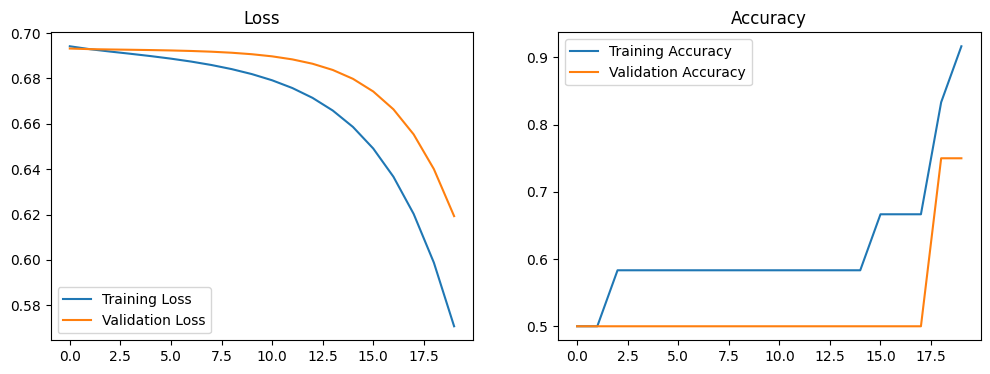

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Training Loss')
plt.plot(historia.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Training Accuracy')
plt.plot(historia.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


In [16]:
loss, accuracy = modelo.evaluate(secuencias_test_pad, etiquetas_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1/1 [==============================] - 0s 45ms/step - loss: 0.6193 - accuracy: 0.7500
Test Loss: 0.6192849278450012
Test Accuracy: 0.75


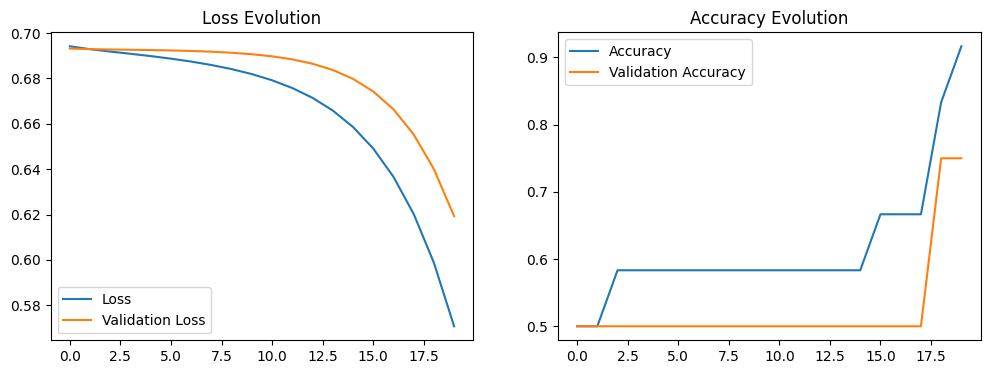

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Loss')
plt.plot(historia.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Accuracy')
plt.plot(historia.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()
